### Exercise 1 - numpy

1. Open the file './befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

In [41]:
import numpy as np

filename = './befkbhalderstatkode.csv'
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
print(bef_stats_df)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 [2015    1    0 5110    1]
 [2015    1    0 5120    4]
 [2015    1    0 5126    1]
 [2015    1    0 5130    5]
 [2015    1    0 5140    3]
 [2015    1    0 5150    5]
 [2015    1    0 5154    1]
 [2015    1    0 5164    3]
 [2015    1    0 5170    3]
 [2015    1    0 5180    3]
 [2015    1    0 5228    1]
 [2015    1    0 5306    2]
 [2015    1    0 5390    1]
 [2015    1    0 5448    1]
 [2015    1    0 5464    1]
 [2015    1    0 5472    1]
 [2015    1    0 5502    1]
 [2015    1    0 5704    1]
 [2015    1    0 5752    1]
 [2015    1    1 5100  540]
 [2015    1    1 5104    3]
 [2015    1    1 5106    2]
 [2015    1    1 5110    3]
 [2015    1    1 5120    4]
 [2015    1    1 5130    3]
 [2015    1    1 5140    1]
 [2015    1    1 5142    1]
 [2015    1    1 5150    2]
 [2015    1    1 5154    1]
 [2015    1    1 5156    3]
 [2015    1    1 5164    2]
 [2015    1    1 5170    4]
 [2015    1    1 518

using this data:
    
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

3. Find out how many people lived in each of the 11 areas in 2015

In [108]:
areas = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
    
stats = bef_stats_df

def get_people():  
    mask = (stats[:,0] == 2015)
    
    return np.array([np.sum(stats[mask & stats[:,1] == area][:,4]) for area in areas])
    
print (get_people())
           

[1243    0    0    0    0    0    0    0    0    0    0]


4. Make a bar plot to show the size of each city area from the smallest to the largest

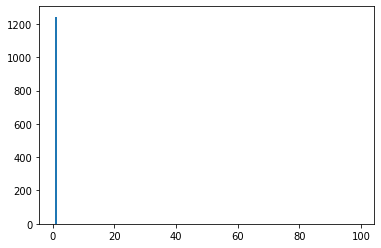

In [69]:
import matplotlib.pyplot as plt

set_of_areas = list(areas.keys())
freq_people = get_people()

plt.bar(set_of_areas, freq_people)
plt.show()

5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [80]:
mask = (stats[:,0] == 2015) & (stats[:,2] == 1) & (stats[:,3] == 5100)
np.sum(stats[mask][:,4])

540

6. How many of those were from the other nordic countries (not dk)

In [91]:
mask = (stats[:,0] == 2015) & (stats[:,2] == 1)
mask_sweden = (stats[:,3] == 5120)
mask_norway = (stats[:,3] == 5110)
mask_finland = (stats[:,3] == 5104)
np.sum(stats[mask & (mask_sweden | mask_norway | mask_finland)][:,4])

10

7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

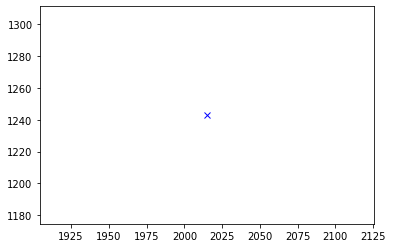

In [149]:
import matplotlib.pyplot as plt

years = np.unique(stats[:,0])
mask_years = years >= 1992

mask = (stats[:,1] == 1)
people = np.array([np.sum(stats[mask & stats[:,0] == year][:,4]) for year in mask_years])

plt.plot(years[mask_years], people, 'bx')
plt.show()
